## Select the data and run you would like to plot below:
GUI coming soon...

In [41]:
from measurement_directory import *
from logparsing import translate_stringy_list
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import ipywidgets as widgets
%matplotlib notebook

def suggest_plotting_vars(filename):
    df = pd.read_csv(filename)
    list_bound_vars = translate_stringy_list(df['ListBoundVariables'][0])
    if 'analyzed_variables' in df.columns:
        analyzed_vars = translate_stringy_list(df['analyzed_variables'][0])
        #parse analyzed_vars
        for i in range(len(analyzed_vars)):
            if analyzed_vars[i] not in df.columns:
                for column in df.columns:
                    if analyzed_vars[i] == column.translate({ord(c): None for c in '[ ]\,\''}):
                        analyzed_vars[i] = column
    else:
        analyzed_vars = []
    return list_bound_vars, analyzed_vars

# filename = measurement_directory() + r'\image_log.csv'
# #can also add subplots for simultaneous plotting of various things

#enable below and disable above for testing mode
filename = r'08\200804\foo\image_log.csv'

list_bound_vars, analyzed_vars = suggest_plotting_vars(filename)
xvars_menu = widgets.Dropdown(options = list_bound_vars, description = 'horizontal')
yvars_menu = widgets.Dropdown(options = analyzed_vars, description = 'vertical')
display(xvars_menu)
display(yvars_menu)

Dropdown(description='horizontal', options=('dummy1', 'FBinGauss', 'drivingFreq', 'repetition'), value='dummy1…

Dropdown(description='vertical', options=('fake analysis 1', 'fake analysis 2'), value='fake analysis 1')

## Run the cell below and rejoice as the data comes in! 

Sometimes the animation doesn't load on the first run. Just run the cell again.

<IPython.core.display.Javascript object>


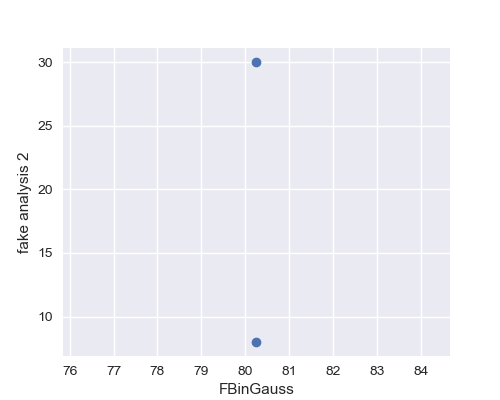

In [42]:
x_param = xvars_menu.value
y_param = yvars_menu.value

#can also add subplots for simultaneous plotting of various things
plt.style.use('seaborn')
plt.figure(figsize = (5,4))
def animate(i):
    global filename
    if os.path.exists(filename):
        data = pd.read_csv(filename)
#         plt.subplot(211)
        x1 = data[x_param]
        y1 = data[y_param]
        plt.cla()
        plt.plot(x1, y1, 'o')
        plt.xlabel(x_param)
        plt.ylabel(y_param)
#         plt.legend(loc='upper left')
#         plt.tight_layout()
        
#         plt.subplot(212)
#         x2 = data[x_param2]
#         y2 = data[y_param2]
#         plt.cla()
#         plt.plot(x2, y2, 'o')
#         plt.xlabel(x_param2)
#         plt.ylabel(y_param2)
#         plt.tight_layout()
    else:
        plt.plot(0,0)

ani = FuncAnimation(plt.gcf(), animate, interval=1000)